<a href="https://colab.research.google.com/github/noda142/Lab1/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2: Digital Imaging Fundamentals with Python**
**Course:** AI342 Image Processing  
**University:** Taibah University  
**College:** Computer Science and Engineering  
**Department:** AI & DS

---
## **Learning Objectives**
* Relate human visual system properties to digital image perception.
* Demonstrate brightness adaptation and contrast effects.
* Simulate sampling and quantisation.
* Work with pixel neighbourhoods and distance measures.
* Apply basic geometric transformations.

## **1. Human Visual Perception: Mach Bands**
**Exercise 1.1:** Simulating Mach bands to show how our eyes perceive transitions.

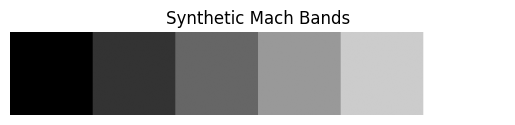

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create Mach Bands
bands = np.zeros((100, 600))
for i in range(6):
    bands[:, i*100 : (i+1)*100] = i*40

plt.imshow(bands, cmap='gray')
plt.title("Synthetic Mach Bands")
plt.axis('off')
plt.show()

## **2. Simultaneous Contrast**
**Exercise 2.1:** Perceived brightness depends on the background.

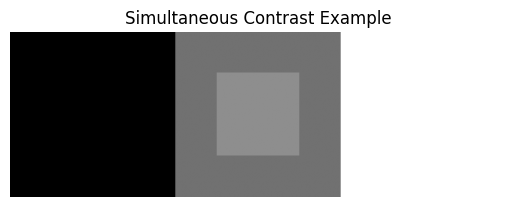

In [2]:
img = np.ones((200, 600)) * 100
img[:, :200] = 20
img[:, 400:] = 200
img[50:150, 250:350] = 120

plt.imshow(img, cmap='gray')
plt.title("Simultaneous Contrast Example")
plt.axis('off')
plt.show()

## **3. Sampling (Spatial Resolution)**
**Exercise 4.1:** Reducing the number of pixels in an image.

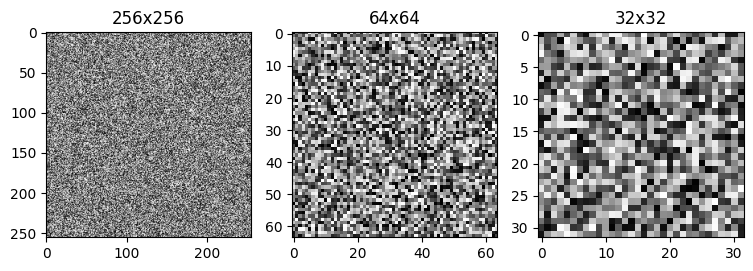

In [3]:
# Create a random image for testing
image = np.random.randint(0, 256, (256, 256))

# Downsampling
down_64 = image[::4, ::4]
down_32 = image[::8, ::8]

plt.figure(figsize=(9,3))
plt.subplot(1,3,1); plt.imshow(image, cmap='gray'); plt.title("256x256")
plt.subplot(1,3,2); plt.imshow(down_64, cmap='gray'); plt.title("64x64")
plt.subplot(1,3,3); plt.imshow(down_32, cmap='gray'); plt.title("32x32")
plt.show()

## **4. Quantisation (Intensity Resolution)**
**Exercise 5.1:** Reducing the number of grey levels.

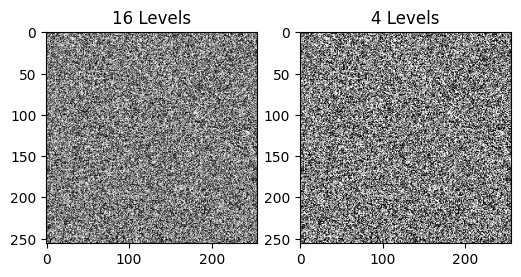

In [4]:
def quantise(img, levels):
    step = 256 // levels
    return (img // step) * step

q16 = quantise(image, 16)
q4 = quantise(image, 4)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1); plt.imshow(q16, cmap='gray'); plt.title("16 Levels")
plt.subplot(1,2,2); plt.imshow(q4, cmap='gray'); plt.title("4 Levels")
plt.show()

## **5. Pixel Neighbourhoods (Exercise 7)**
**Task:** Complete the code to define the 4-neighbors ($N_4$) and 8-neighbors ($N_8$) for point $p$.

In [5]:
p = (5, 5)

# Student Task: Define the coordinates relative to p
N4 = [] # Fill here
N8 = [] # Fill here

print("N4 Neighbourhood:", N4)
print("N8 Neighbourhood:", N8)

N4 Neighbourhood: []
N8 Neighbourhood: []


## **6. Distance Measures (Exercise 8)**
**Task:** Implement the formulas for Euclidean, City-block ($D_4$), and Chessboard ($D_8$) distances.

In [6]:
import math

p = (2, 3)
q = (7, 9)

# Student Task: Implement the formulas
D_euclid = 0 # Hint: use math.sqrt
D4 = 0       # Hint: use abs(x1-x2) + abs(y1-y2)
D8 = 0       # Hint: use max(abs(x1-x2), abs(y1-y2))

print("Euclidean:" ,D_euclid)
print("City-block(D4):",D4)
print("Chessboard (D8):",D8)

Euclidean: 0
City-block(D4): 0
Chessboard (D8): 0


## **7. Geometric Transformations**
**Exercise 9.1 & 10.1:** Translation and Interpolation.

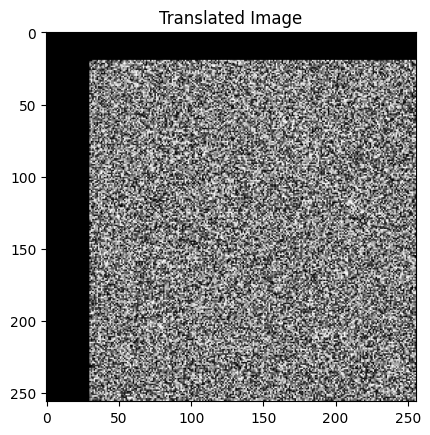

In [7]:
# Write the code here
translated = np.zeros_like(image)
translated[20:, 30:] = image[:-20, :-30]

plt.imshow(translated, cmap='gray')
plt.title("Translated Image")
plt.show()


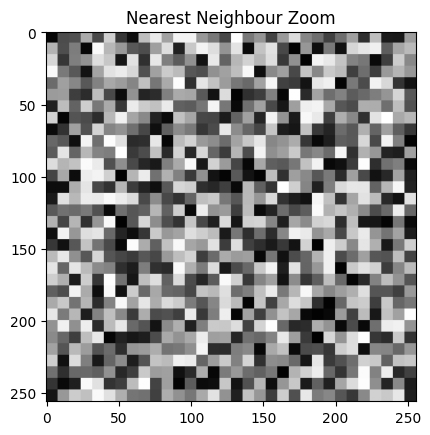

In [8]:
zoom = np.repeat(np.repeat(down_32, 8, axis=0), 8, axis=1)

plt.imshow(zoom, cmap='gray')
plt.title("Nearest Neighbour Zoom")
plt.show()

## **8. Reflection & Mini Project**
**Task:**

1.	Start with a grey scale image
2.	Create three versions with different spatial resolutions
3.	Create three versions with different intensity resolutions
4.	Comment on which degradation affects interpretability more and why

**Your explanation must reference:**


•	Sampling

•	Quantisation

•	Human visual perception
________________________________________
**Reflection questions**

1.	Why is a digital image always an approximation of reality?

2.	How does human perception complicate objective image analysis?

3.	Why is interpolation unavoidable in geometric transformations?

***Note:***

 Organize your project into logical steps using separate cells, include a Text Cell before each stage to explain your approach, and ensure all results are clearly visualized using titles and subplots

## Task 2: Create three versions with different spatial resolutions (Sampling)

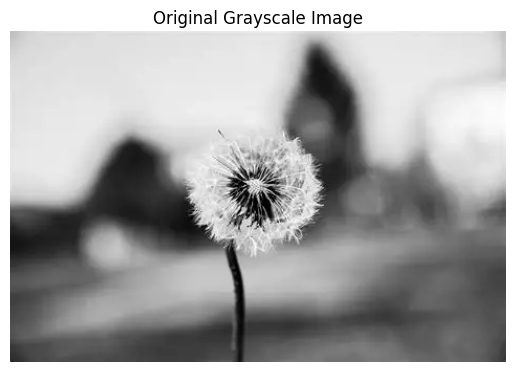

In [20]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

image = imread('OIP.webp')# grayscale image

plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()






## Task 2: Create three versions with different spatial resolutions (Sampling)

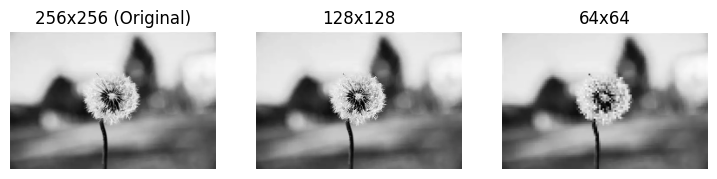

In [17]:
import matplotlib.pyplot as plt
img_256 = image
img_128 = image[::2, ::2]
img_64 = image[::4, ::4]

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.imshow(img_256, cmap='gray')
plt.title("256x256 (Original)")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_128, cmap='gray')
plt.title("128x128")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_64, cmap='gray')
plt.title("64x64")
plt.axis('off')

plt.show()

## Task 3: Create three versions with different intensity resolutions (Quantisation)

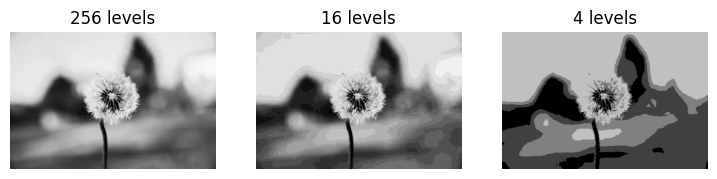

In [22]:
import matplotlib.pyplot as plt

def quantise(img, levels):
    step = 256 // levels
    return (img // step) * step

q256 = quantise(image, 256)
q16 = quantise(image, 16)
q4 = quantise(image, 4)

plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.imshow(q256, cmap='gray')
plt.title("256 levels")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(q16, cmap='gray')
plt.title("16 levels")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(q4, cmap='gray')
plt.title("4 levels")
plt.axis('off')

plt.show()

# Task 4: Comment on resolution degradation and human visual perception

 Sampling reduces spatial resolution and removes fine details from the image.
  
 Quantisation reduces intensity resolution and causes banding effects.

 Human visual perception is more sensitive to loss of spatial detail than to loss of intensity resolution.

 Therefore, degradation due to sampling usually affects image interpretability more than quantisation.

# Reflection questions

1. Why is a digital image always an approximation of reality?

   A digital image is an approximation because it uses limited pixels and intensity levels, so some information is lost.

⸻

2. How does human perception complicate objective image analysis?

   Human perception is affected by contrast and surrounding brightness, so the same pixel values can appear different.

⸻

3. Why is interpolation unavoidable in geometric transformations?

   Interpolation is unavoidable because geometric transformations produce non-integer pixel positions that require estimating new pixel values